# MS BGD : MDI 720 Statistique

## TP 1 : Regression linéaire

#### Imporation des librairies python

In [1]:
# Dans cette cellule de code seront importé toutes les librairies nécéssaires au TP

import pandas as pd # importation de la librairie pandas (manipulation des dataframes)
import matplotlib.pyplot as plt # importation de la librairie pour visualiser des graphes
import numpy as np

### Exercice 1 : Analyse de la base de données

   #### Question 1

Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [2]:
# On importe le dataset "invest.txt"
data_invest = pd.read_csv("invest.txt", sep=" ")

# On visualise les 5 premières lignes du dataset
data_invest.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


In [3]:
# On visualise le type des colonnes 

print(type(data_invest["year"][0])) # On s'assure que "year" est bien un "entier"
print(type(data_invest["gnp"][0])) # On s'assure que "gnp" est bien un "flottant"
print(type(data_invest["invest"][0])) # On s'assure que "invest" est bien un "flottant"
print(type(data_invest["cpi"][0])) # On s'assure que "cpi" est bien un "flottant"
print(type(data_invest["interest"][0])) # On s'assure que "interest" est bien un "flottant"

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


#### Question 2

Réaliser le graphe suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique.

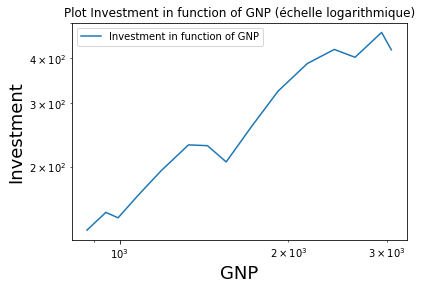

In [4]:
X_gnp = data_invest["gnp"]
Y_invest = data_invest["invest"]

plt.plot(X_gnp, Y_invest, label="Investment in function of GNP")

# On passe en echelle semi algorithme
plt.semilogx()
plt.semilogy()

# On rend jolie le graphe
plt.xlabel('GNP', fontsize = 18) # ajout d'un nom à l'axe des abscisses
plt.ylabel('Investment', fontsize = 18) # ajout d'un nom à l'axe des ordonnées
plt.title("Plot Investment in function of GNP (échelle logarithmique)") # ajout d'un article titre au graphe
plt.legend()
plt.show() # on affiche le graphe

#### Question 3

Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible

**Formule de la regression linéaire** 

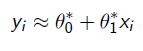

avec thêta_0 = intercept; thêta_1 = pente (coeff directeur)

**Calcul de thêta_0 et thêta_1**

Formule du cours :

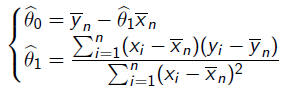

In [5]:
# Regression linéaire

y = np.log(data_invest["invest"])
x = np.log(data_invest["gnp"])
#print(x)

# On calcul les variables qui seront utilisées pour le calcul de a (i.e la pente) et b (i.e intercept)
nb_data_points = len(data_invest["invest"])

# calcul x_mean
x_mean = x.mean(axis=0)
#print(x_mean)

# calcul y_mean
y_mean = y.mean(axis=0)
#print(y_mean)

numerateur = 0
denominateur = 0

#Calcule de thêta_1 (i.e pente)
for i in range (nb_data_points):
    numerateur = numerateur + ((x[i] - x_mean) * (y[i] - y_mean))
    denominateur = denominateur + ((x[i] - x_mean)**2)

theta_1 = numerateur / denominateur
    
print("theta_1 (i.e pente) = ", theta_1)

# Calcul de thêta_0 (i.e intercept)
theta_0 = y_mean - (theta_1 * x_mean)

print("theta_0 (i.e intercept) = ", theta_0)
    
# Calul de l'écart type 


theta_1 (i.e pente) =  1.015281401598871
theta_0 (i.e intercept) =  -1.9635913352301833


##### Résultat : <br> $\hat\theta_{0} = -1.96 (Intercept)$ <br> $\hat\theta_{1} = 1.0152 (pente)$

**Formule de l'écart-type pour l'intercept ($\hat\theta_{0}$)**
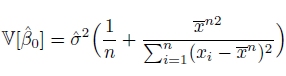

**Avec**
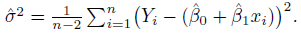

source : Formule du polycopié (Exercice 12)

In [6]:
# Calcul sigma_carre

sigma_carre = 0

for i in range(nb_data_points):
    sigma_carre = sigma_carre + ((y[i] - (theta_0 + (theta_1 * x[i])))**2)

sigma_carre_result = (1/(nb_data_points - 2)) * sigma_carre
    
print("sigma_carre = ", sigma_carre_result)

sigma_carre =  0.0076763385554603995


**Calcul de l'écart type de l'intercept ($\hat\theta_{0}$)**

In [7]:
sum_Xi_minus_Xmean = 0

for i in range(nb_data_points):
    sum_Xi_minus_Xmean = sum_Xi_minus_Xmean + ((x[i] - x_mean)**2)

# On calcul la variance de l'intercept
var_intercept =  sigma_carre_result * ((1 / nb_data_points) + ((x_mean**2) / sum_Xi_minus_Xmean))

# On calcul l'écart-type de l'intercept
ecart_type_intercept = var_intercept**(1/2)

print("ecart_type_intercept = ", ecart_type_intercept)

ecart_type_intercept =  0.4095472716623082


#### L'écart-type de l'intercept ($\hat\theta_{0}$) :

$\hat\sigma_{\hat\theta_{0}} = 0.409$

#### Calcule de l'écart-type de la pente ($\hat\theta_{1}$)
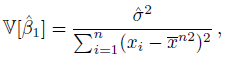

source : Formule du polycopié (Exercice 12)

In [8]:
sum_Xi_minus_Xmean_squared = 0

for i in range(nb_data_points):
    sum_Xi_minus_Xmean_squared = sum_Xi_minus_Xmean_squared + ((x[i] - x_mean)**2)

# On calcul la variance de la pente
var_pente =  sigma_carre_result / sum_Xi_minus_Xmean_squared

# On calcul l'écart-type de la pente
ecart_type_pente = var_pente**(1/2)

print("ecart_type_pente = ", ecart_type_pente)

ecart_type_pente =  0.055383060354852805


#### L'écart-type de la pente ($\hat\theta_{1}$) :

$\hat\sigma_{\hat\theta_{1}} = 0.0553$


##### Calcul du coefficient de détermination (${R}^2$)

**Formule du cours**

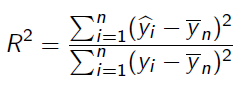

In [9]:
# Calcul du coefficient de détermination

y_pred = []

for i in range(nb_data_points):
    theta_chapeau = (theta_1*x[i]) + theta_0
    y_pred.append(theta_chapeau)
    
#print(y_pred)
#print(len(y_pred))

numerateur_coeff_det = 0
denominateur_coeff_det = 0

for i in range(nb_data_points):
    numerateur_coeff_det = numerateur_coeff_det + ((y_pred[i] - y_mean)**2)
    denominateur_coeff_det = denominateur_coeff_det + ((y[i] - y_mean)**2)
    
r_carre = numerateur_coeff_det / denominateur_coeff_det

print("coefficient de détermination (r^2) = ", r_carre)

coefficient de détermination (r^2) =  0.9627572956057855


#### Résulat : <br> ${R}^2 = 0.9627$

#### Question 4

La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student (t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

**Calcul de la somme des carrés des résidus**

In [10]:
# Calcul de la somme des erreurs aux carrés (Mean-Squared-Error noté "mse")

mse = 0

for i in range(nb_data_points):
    y_prediction = theta_0 + (theta_1 * x[i])
    mse = mse + ((y[i] - y_prediction)**2)
    
print("mse = ", mse)

mse =  0.09979240122098519


**Calcul de l'estimation de la variance de l'erreur**

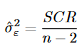

source : https://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

In [11]:
sigma_e = mse / (nb_data_points - 2)

print("sigme_e =", sigma_e)

sigme_e = 0.0076763385554603995


**Calcul de la somme de écarts à la moyenne au carré**

In [12]:
sum_x_squared = 0
print(x_mean)

for i in range(nb_data_points):
    sum_x_squared = sum_x_squared + ((x[i] - x_mean)**2)
    
print("sum_x_squared = ", sum_x_squared)

7.383521410468694
sum_x_squared =  2.502650592982517


**Calcul de l'estimation de l'écart-type de la pente**

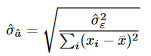

source : https://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

In [13]:
sigma_a = (sigma_e / sum_x_squared)**(1/2)

print("sigma_a = ", sigma_a)

sigma_a =  0.055383060354852805


**Loi de Student : Statistique de test (t-stat)** 
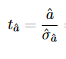

source : https://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

In [14]:
# Calcul de t_stat

t_stat = theta_1 / sigma_a

print("t_stat = ", t_stat)

t_stat =  18.33198445686668


In [15]:
from scipy import stats

# n-p-1 avec 
# n = nb_data_point = 15
# p = 1 car on a une variable explicative qui est "GNP"

liberty_degree = nb_data_points - 2 # on détermine le degré de liberté

stats.t(df=liberty_degree).ppf((0.025, 0.975))

array([-2.16036866,  2.16036866])

**Calcul de la p-valeur**

In [16]:
from scipy.stats import t

# Calcul de la p-valeur

p_value = (1.0 - t.cdf(abs(t_stat), liberty_degree)) * 2.0
print("p-valeur = ", p_value)

p-valeur =  1.1363709973011282e-10


#### Discussion de la p-valeur : 

Pour un risque fixé $\alpha$ = 5% (0.05) seul critique pour la loi de student de n-2 degré de liberté. Puisque |1.13e-10| << $\alpha$, on peut rejeter l'hypothèse nulle donc on peut conclure que la pente est non nulle pour un risque de 5%

#### Question 5

Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%

**Calcul de l'estimation de l'investissement prédit par le modèle pour GNP = 1000**

In [17]:
y_pred_1000_log = theta_0 + (theta_1 * np.log(1000))

y_pred_1000 = np.exp(y_pred_1000_log)

print("y_pred_1000 = ", y_pred_1000)

y_pred_1000 =  155.97942793105466


**Calcul du quantile de student à un niveau de confiance de 90%**

D'où alpha = 0.10

In [18]:
# On calcul notre loi de student pour un niveau de confiance alpha = 0.10

from scipy import stats

liberty_degree = nb_data_points - 2 # on détermine le degré de liberté

# On calcul les bornes de l'intervalle de confiance pour un risque alpha = 10%
interval_conf_sup = 1 - (0.10 / 2)
interval_conf_inf = round(1 - interval_conf_sup, 2)

print(interval_conf_sup)
print(interval_conf_inf)

quantile_student = stats.t(df=liberty_degree).ppf((interval_conf_inf, interval_conf_sup))

quantile_student

0.95
0.05


array([-1.7709334,  1.7709334])

**Formule l'Intervalle de Confiance (IC) au niveau 1-alpha**

**$\alpha = 10\%$**

On sait que l'on obtient un quantile de +/- 1.77 pour un risque alpha = 10%

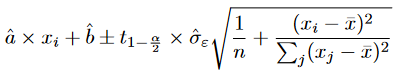

avec : 

- b_chapeau = theta_0 (intercept) 
- a_chapeau = theta_1 (pente)
- t_1_alpha/2 = +/- 1.77
- sigma_epsilon_chapeau = sigma_e
- n = nb_data_points
- x_bar = x_mean

source : https://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

**On calcul l'Intervalle de confiance (IC) pour la valeur GNP = 1000**

In [19]:
Xi_minus_X_moy = (np.log(1000) - x_mean)**2

sum_Xi_minus_X_moy = 0

sigma_epsilon = sigma_e**(1/2)

for i in range(nb_data_points):
    sum_Xi_minus_X_moy = sum_Xi_minus_X_moy + ((x[i] - x_mean)**2)
    
temp = ((1/nb_data_points) + (Xi_minus_X_moy / sum_Xi_minus_X_moy))**(1/2)

IC_inf_1000 = y_pred_1000_log + quantile_student[0] * sigma_epsilon * temp

IC_sup_1000 = y_pred_1000_log + quantile_student[1] * sigma_epsilon * temp

print("IC_inf_1000 = ", IC_inf_1000)
print("IC_sup_1000 = ", IC_sup_1000)

IC_inf_1000 =  4.988222845971109
IC_sup_1000 =  5.111225406662491


#### On calcul l'intervalle de confiance pour la variable "Investment"

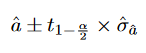

source : https://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

In [20]:
IC_inf_investment = theta_1 + (quantile_student[0] * sigma_a)

IC_sup_investment = theta_1 + (quantile_student[1] * sigma_a)

print("IC_inf_investment = ", IC_inf_investment)
print("IC_sup_investment = ", IC_sup_investment)

IC_inf_investment =  0.9172016904445096
IC_sup_investment =  1.1133611127532324


#### Question 6

Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de
log(GNP) comprises entre le maximum et le minimum observé sur les données)

**Calcul de l'Intervalle de Confiance (IC) pour les valeurs log(GNP)**

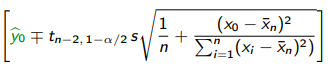

source : http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/IAAAM2/SlidesModStat_C1_print.pdf

In [21]:
Xi_minus_X_moy_list = []

for i in range(nb_data_points):
    X_minus_X_moy_value = (x[i] - x_mean)**2
    Xi_minus_X_moy_list.append(X_minus_X_moy_value)
    
#print(Xi_minus_X_moy_list)

temp_list = []

for i in range(nb_data_points):
    temp_value = ((1/nb_data_points) + (Xi_minus_X_moy_list[i] / sum_Xi_minus_X_moy))**(1/2)
    temp_list.append(temp_value)
    
#print(temp_list)

Y_pred_log_list = []


for i in range(nb_data_points):
    Yi_pred__log = theta_0 + (theta_1 * x[i])
    Y_pred_log_list.append(Yi_pred__log)
#print(Y_pred_log_list)


IC_inf_list = []
IC_sup_list = []

for i in range(nb_data_points):
    IC_inf_i = Y_pred_log_list[i] + quantile_student[0] * sigma_epsilon * temp_list[i]
    IC_sup_i = Y_pred_log_list[i] + quantile_student[1] * sigma_epsilon * temp_list[i]
    IC_inf_list.append(IC_inf_i)
    IC_sup_list.append(IC_sup_i)

print("IC_inf_list = ", IC_inf_list)
print("")
print("IC_sup_list = ", IC_sup_list)

IC_inf_list =  [4.840199012011407, 4.925321590832868, 4.980237110361786, 5.069459451428372, 5.172817735126547, 5.292187604780821, 5.374218085545292, 5.453916718882029, 5.558582370876393, 5.667508276950662, 5.783948473699531, 5.889512235829355, 5.969933067949984, 6.072477642168017, 6.109782781459362]

IC_sup_list =  [4.984388933660242, 5.0571071288933735, 5.104333664704683, 5.181745645671263, 5.272845495943495, 5.380830687990635, 5.457465738981651, 5.534387391850743, 5.639726920630189, 5.754728543482655, 5.882915876427082, 6.00263470477502, 6.095428643620566, 6.215159835751634, 6.259017563486635]


**Calcul de l'Intervalle de Prédiction (IP) pour les valeurs log(GNP)**

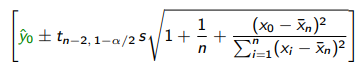

source : http://pageperso.lif.univ-mrs.fr/~alexis.nasr/Ens/IAAAM2/SlidesModStat_C1_print.pdf

In [22]:
Xi_minus_X_moy_list = []

for i in range(nb_data_points):
    X_minus_X_moy_value = (x[i] - x_mean)**2
    Xi_minus_X_moy_list.append(X_minus_X_moy_value)
    
#print(Xi_minus_X_moy_list)

temp_list_pred = []

for i in range(nb_data_points):
    temp_value_pred = (1 + (1/nb_data_points) + (Xi_minus_X_moy_list[i] / sum_Xi_minus_X_moy))**(1/2)
    temp_list_pred.append(temp_value_pred)
    
#print(temp_list)

Y_pred_log_list = []


for i in range(nb_data_points):
    Yi_pred__log = theta_0 + (theta_1 * x[i])
    Y_pred_log_list.append(Yi_pred__log)
#print(Y_pred_log_list)


IP_inf_list = []
IP_sup_list = []

for i in range(nb_data_points):
    IP_inf_i = Y_pred_log_list[i] + quantile_student[0] * sigma_epsilon * temp_list_pred[i]
    IP_sup_i = Y_pred_log_list[i] + quantile_student[1] * sigma_epsilon * temp_list_pred[i]
    IP_inf_list.append(IP_inf_i)
    IP_sup_list.append(IP_sup_i)

print("IP_inf_list = ", IP_inf_list)
print("")
print("IP_sup_list = ", IP_sup_list)

IP_inf_list =  [4.74120260704063, 4.822642627108589, 4.875178952069678, 4.960597641265886, 5.0598102662984745, 5.175143192344529, 5.255195981645681, 5.333860276489862, 5.438777959286469, 5.549946403351729, 5.6705726995205845, 5.780925823275409, 5.865313424808953, 5.973043670039186, 6.01223070039658]

IP_sup_list =  [5.083385338631019, 5.159786092617653, 5.209391822996791, 5.29060745583375, 5.385852964771568, 5.497875100426927, 5.576487842881262, 5.654443834242909, 5.759531332220114, 5.872290417081588, 5.996291650606028, 6.111221117328967, 6.200048286761596, 6.314593807880465, 6.356569644549418]


###### On trace sur le même graphique en échelle logarithmique

- L'intervalle de confiance (IC)
- L'intervalle de prédiction (IP)
- La courbe des valeurs prédites (courbe de regression linéaire)
- Les points de données

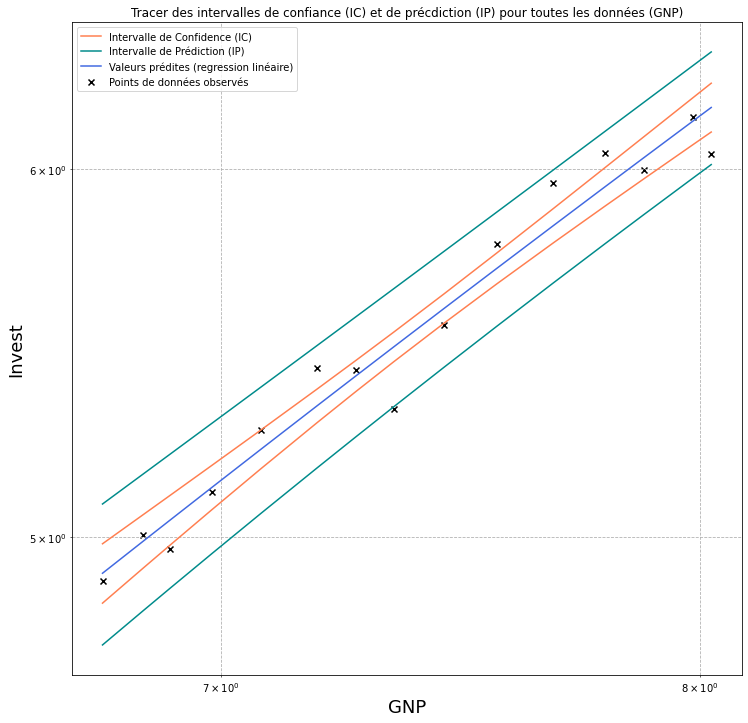

In [23]:
plt.figure(figsize=(12,12))

plt.scatter(x, y, label='Points de données observés', marker='x', color='black')

plt.semilogx()
plt.semilogy()

plt.grid(True, which="both", linestyle='--')

plt.plot(x, IC_sup_list, color='coral', label='Intervalle de Confidence (IC)')
plt.plot(x, IC_inf_list, color='coral')

plt.plot(x, IP_sup_list, color='darkcyan', label='Intervalle de Prédiction (IP)')
plt.plot(x, IP_inf_list, color='darkcyan')

plt.plot(x, y_pred, color='royalblue', label='Valeurs prédites (regression linéaire)')

plt.xlabel('GNP', fontsize = "18")
plt.ylabel('Invest', fontsize = "18")
plt.title("Tracer des intervalles de confiance (IC) et de précdiction (IP) pour toutes les données (GNP)")
plt.legend()
plt.show()

#### Question 7

En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand  𝐺𝑁𝑃  vaut  1000 . La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes

In [24]:
# Utilisation de la librairie statsmodels pour vérifier les valeurs calculées précédemment avec la fonction summary()

# source : https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does

import statsmodels.api as sm

X_ = sm.add_constant(x.ravel())

# On fit le modèle de regression linéaire
results = sm.OLS(y,X_).fit()

# On visualise le rapport de statistique lié au modèle de regression linéaire
results.summary()  

C:\Users\asus\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 invest   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     336.1
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.14e-10
Time:                        08:38:56   Log-Likelihood:                 16.311
No. Observations:                  15   AIC:                            -28.62
Df Residuals:                      13   BIC:                            -27.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9636      0.410     -4.795      0.000      -2.848      -1.079
x1             1.0153      0.055     18.332      0.000       0.896       1.135
==============================================================================
Omnibus:                        0.683   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.597
Skew:                          -0.412   Prob(JB):                        0.742
Kurtosis:                       2.474   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion : 

### Avec la librairie statsmodel nous obtenons les valeurs suivantes 

##### $\hat\theta_{0} = -1.963$ (Intercept) <br> $\hat\theta_{1} = 1.0513$ (GNP) 

$\hat\sigma_{\hat\theta_{0}} = 0.410$ (Intercept)

$\hat\sigma_{\hat\theta_{1}} = 0.055$ (GNP)

**Cela correspond bien aux valeurs que nous avons trouvés aux questions précédentes**

**La librairie valide bien les résultats que nous avons trouvés**

In [25]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

def predict(x):
    return slope * x + intercept

x_1000_pred = np.log(1000)

x_1000_predict = predict(x_1000_pred)

x_1000_real_value = np.exp(x_1000_predict)

print("résulat prédit (log) = ", x_1000_predict)

print("résultat prédit réel = ", x_1000_real_value)

résulat prédit (log) =  5.049724126316802
résultat prédit réel =  155.97942793105494


#### Question 8

Sur un graphe avec échelle logarithmique, avec  𝐺𝑁𝑃  en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand  𝐺𝑁𝑃  vaut  1000  (on donnera à ce point une couleur différente).

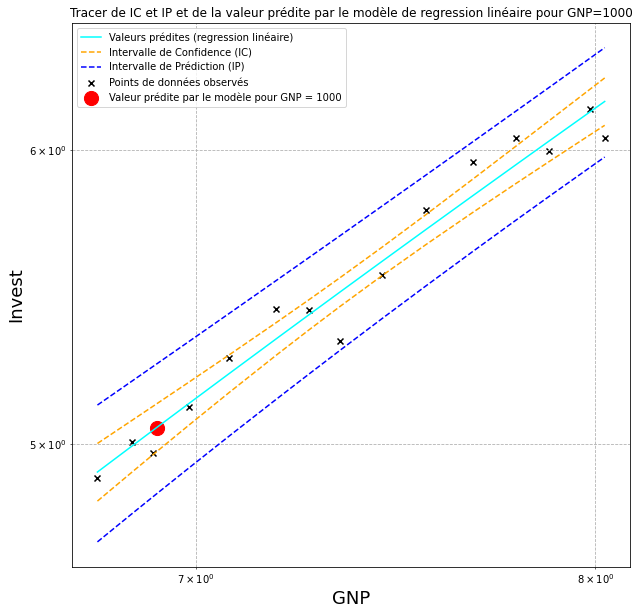

In [26]:
# source : https://stackoverflow.com/questions/67737684/plotting-confidence-interval-for-linear-regression-line-of-a-pandas-time-series

import statsmodels.api as sm

X__ = sm.add_constant(x.ravel())

# On fit le modèle de regression linéaire
ols_model = sm.OLS(y,X__)
est = ols_model.fit()
out = est.conf_int(alpha = 0.05, cols = None)

# On trace le graphique

plt.figure(figsize=(10,10))

plt.scatter(x, y, label='Points de données observés', marker='x', color='black')

plt.semilogx()
plt.semilogy()

plt.grid(True, which="both", linestyle='--')

y_pred_ols_model = est.predict(X__)

plt.plot(x, y_pred_ols_model, color='cyan', label='Valeurs prédites (regression linéaire)')
pred_ = est.get_prediction(X__).summary_frame()

plt.plot(x, pred_['mean_ci_upper'], linestyle='--', color='orange', label='Intervalle de Confidence (IC)')
plt.plot(x, pred_['mean_ci_lower'], linestyle='--', color='orange')

plt.plot(x, pred_['obs_ci_upper'], linestyle='--', color='blue', label='Intervalle de Prédiction (IP)')
plt.plot(x, pred_['obs_ci_lower'], linestyle='--', color='blue')

plt.scatter(x_1000_pred, y_pred_1000_log, label="Valeur prédite par le modèle pour GNP = 1000", marker="o", color="red", s=200)

plt.xlabel('GNP', fontsize = "18")
plt.ylabel('Invest', fontsize = "18")
plt.title("Tracer de IC et IP et de la valeur prédite par le modèle de regression linéaire pour GNP=1000")
plt.legend()
plt.show()

##### NOTE : On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique).
Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations
élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de
numpy.linalg).

#### Question 9 

Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram non standardisée
Z^TZ. Est-elle de rang plein ?

In [27]:
data_invest_ = pd.read_csv("invest.txt", sep = " ")

data_invest_["invest"] = np.log(data_invest_["invest"])
data_invest_["gnp"] = np.log(data_invest_["gnp"])

data_invest_.head(5)

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50


In [28]:
matrice_Zi = data_invest_[["gnp", "interest"]]
matrice_Z = matrice_Zi.copy()
matrice_Z["column_1"] = np.ones(matrice_Z.shape[0])
Z = matrice_Z[['column_1', 'gnp', 'interest']]
Z

,column_1,gnp,interest
0,1.0,6.772394,5.16
1,1.0,6.850126,5.87
2,1.0,6.900429,5.95
3,1.0,6.982492,4.88
4,1.0,7.078257,4.50
5,1.0,7.190224,6.44
6,1.0,7.268362,7.83
7,1.0,7.345494,6.25
8,1.0,7.448916,5.50
9,1.0,7.559195,5.46


**Calcul de $(Z^{T}Z)$ (non standardisé)**

In [29]:
# Calul de la matrice de Gram non standardisée (Z^TZ)

matrice_gram = np.dot(Z.T, Z)
matrice_gram

array([[ 15.        , 110.75282116, 111.79      ],
       [110.75282116, 820.24847688, 839.18854302],
       [111.79      , 839.18854302, 943.8557    ]])

In [30]:
# Rang de la matrice de Gram

from numpy.linalg import matrix_rank

matrice_gram_rang = matrix_rank(matrice_gram)

matrice_gram_rang

3

**Définition matrice rang plein** 

Si aucune colonne n'est linéairement dépendante des autres colonnes, le rang de la matrice est égal au nombre de colonnes de la matrice et la matrice est dite de rang (colonne) plein. 

Avec la librairie matrix_rank, on obtient la valeur 3. Donc le rang de la matrice de Gram non standardisée est de 3. Cela correspond au nombre de colonne de la matrice.

Conclusion : La matrice de Gram non standardisé (Z^TZ) est de rang plein.

#### Question 10

Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart types
ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité
de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une
forme convenable. Discuter de la significativité des coefficients.

**Regression Linéaire multiple**

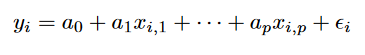

**Pour une regression multiple l'estimateur des moindres carrés ordinaires (MCO) des coefficients du modèle s'écrit**

# $ a_{chapeau} = (Z^{T}Z)^{-1}(Z^{T}Y)$

**Calcul de $(Z^{T}Z)^{-1}$**

In [31]:
gram_inv = np.linalg.inv(matrice_gram)

gram_inv

array([[ 5.35582897e+01, -8.20827474e+00,  9.54604525e-01],
       [-8.20827474e+00,  1.27148125e+00, -1.58296934e-01],
       [ 9.54604525e-01, -1.58296934e-01,  2.87392805e-02]])

**Calcul de $(Z^{T}Y)$**

In [32]:
Y = data_invest_["invest"]

Z_transpose_Y = np.dot(Z.T, Y)

Z_transpose_Y

array([ 82.99140947, 615.30974329, 632.27546864])

**Calcul de $(Z^{T}Z)^{-1}(Z^{T}Y)$**

In [33]:
estimateur_MCO = np.dot(gram_inv, Z_transpose_Y)
estimateur_MCO

array([-2.18045473,  1.05124269, -0.00652888])

### Les 3 estimateurs sont : 
##### $\hat\theta_{0} = -2.180$ <br> $\hat\theta_{1} = 1.051$ <br> $\hat\theta_{2} = -0.006$

#### Calcul de l'écart-type des 3 estimateurs

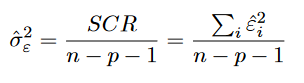

**Avec le résidus**

### $\hat\epsilon_{i} = y - y_{pred}$

**Et**

$y_{pred} = \hat\theta_{0} + \hat\theta_{1}gnp + \hat\theta_{2}interest$

**Ici le DDL (Degré de liberté vaut) :**

$n = 15$;
$p = 2$;
$n - p - 1 = 12$

On obtient la variance des 3 estimateurs en se reportant aux éléments diagonaux de la matrice l'estimation de la variance des coefficients ci-dessous : 


$\hat\omega_{achapeau} = {\hat\sigma_{\epsilon}}^2{(Z^{T}Z)}^{-1}$




#### Calcul de : $y_{pred} = \hat\theta_{0} + \hat\theta_{1}gnp + \hat\theta_{2}interest$

In [34]:
y_pred_list = []

for i in range(len(data_invest_["invest"])):
    y_pred_temp = estimateur_MCO[0] + (estimateur_MCO[1] * data_invest_["gnp"][i]) + (estimateur_MCO[2] * data_invest_["interest"][i]) 
    y_pred_list.append(y_pred_temp)
    
y_pred_list

[4.905285574249458,
 4.982365818754068,
 5.03472347300239,
 5.127977630671236,
 5.231131527535866,
 5.336169492998034,
 5.409237084824936,
 5.5006366043918895,
 5.61425504840947,
 5.730445727065057,
 5.844034089358127,
 5.942253701842765,
 6.022200692521865,
 6.126502430958745,
 6.184190570320067]

#### Calcul du résidus : ${\hat\epsilon_{i}}^2 = {(y - y_{pred})}^2$

In [35]:
epsilon_i_carre = []

for i in range(len(data_invest_["invest"])):
    epsilon_temp = (data_invest_["invest"][i] - y_pred_list[i])**2
    epsilon_i_carre.append(epsilon_temp)

epsilon_i_carre

[0.00016086729276603586,
 0.0005565770751792033,
 0.004035076010225948,
 0.00018450066766107005,
 0.001752932022151583,
 0.010209055817967013,
 0.00053703502701399,
 0.029678715763529942,
 0.0038048092078465925,
 0.0025610060086871784,
 0.012849690972187595,
 0.011049894249585336,
 0.0006251306851368774,
 0.0008653405394744052,
 0.01943856412682432]

#### Calcule de : $\hat\sigma_{\epsilon}^{2}$ 

In [36]:
sigma_epsilon_carre = sum(epsilon_i_carre) / (15 - 2 - 1)

sigma_epsilon_carre

0.008192432955519757

#### Calcul de : $\hat\omega_{achapeau} = {\hat\sigma_{\epsilon}}^2{(Z^{T}Z)}^{-1}$

In [37]:
omega_a_chapeau = sigma_epsilon_carre * gram_inv

omega_a_chapeau

array([[ 4.38772697e-01, -6.72457405e-02,  7.82053357e-03],
       [-6.72457405e-02,  1.04165249e-02, -1.29683702e-03],
       [ 7.82053357e-03, -1.29683702e-03,  2.35444629e-04]])

On se réfère au diagonale de la la matrice $\hat\omega_{achapeau}$ pour obtenir la variance des 3 estimateurs $\hat\theta_{0}$  $\hat\theta_{1}$ et  $\hat\theta_{2}$

In [38]:
element_diagonaux = np.diag(omega_a_chapeau)

element_diagonaux

array([4.38772697e-01, 1.04165249e-02, 2.35444629e-04])

#### Nous venons de calculer la variance de chaque estimateur. Dorénavant il convient de calculer leur écart-type en calculant la racine carré de chaque élément diagonaux

In [39]:
ecart_type_theta_0 = np.sqrt(element_diagonaux[0])

ecart_type_theta_1 = np.sqrt(element_diagonaux[1])

ecart_type_theta_2 = np.sqrt(element_diagonaux[2])

print("ecart_type_theta_0 = ", ecart_type_theta_0)

print("ecart_type_theta_1 = ", ecart_type_theta_1)

print("ecart_type_theta_2 = ", ecart_type_theta_2)

ecart_type_theta_0 =  0.6623991977963681
ecart_type_theta_1 =  0.10206137806192297
ecart_type_theta_2 =  0.015344205065604181


### Conclusion : 

#### L'écart-type pour les 3 estimateurs vaut :

$\hat\sigma_{\hat\theta_{0}} = 0.662$ (intercept)

$\hat\sigma_{\hat\theta_{1}} = 0.102$ (GNP)

$\hat\sigma_{\hat\theta_{2}} = 0.0153$ (Interest)

#### Cacul de ${R}^2$

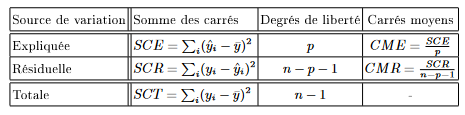

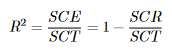

source : https://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

Nous avons déjà calculé $SCR$ précédemment. Par conséquent il convient maintenant de calculer $SCT$

#### Calcul de $SCT = \sum_{i=1}^{n} {(y_{i} - \bar{y})}^2$

In [40]:
SCT = 0
for i in range(len(data_invest_["invest"])):
    SCT = SCT + (data_invest_["invest"][i] - data_invest_["invest"].mean())**2

SCT
    

2.679515433806349

Calcul du coefficient de détermination ${R}^2$ qui vaut : 

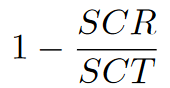

In [41]:
coeff_det_R2 = 1 - (sum(epsilon_i_carre) / SCT)

print("R^2 = ", coeff_det_R2)

R^2 =  0.9633108306726246


#### ${R}^2 = 0.963$

#### Test de Student de signicativité pour chaque coefficient

**Avec**

$\alpha = 0.05$

In [42]:
theta_chapeau_0 = estimateur_MCO[0]

theta_chapeau_1 = estimateur_MCO[1]

theta_chapeau_2 = estimateur_MCO[2]

print(theta_chapeau_0)

print(theta_chapeau_1)

print(theta_chapeau_2)

-2.180454725912682
1.0512426913200557
-0.006528879406129562


#### Rappel :

##### $\hat\theta_{0} = -2.180$ (Intercept) <br> $\hat\theta_{1} = 1.051$ (GNP) <br> $\hat\theta_{2} = -0.006$ (Investment)

##### L'écart-type pour les 3 estimateurs vaut :

$\hat\sigma_{\hat\theta_{0}} = 0.662$ (Intercept)

$\hat\sigma_{\hat\theta_{1}} = 0.102$ (GNP)

$\hat\sigma_{\hat\theta_{2}} = 0.0153$ (Investment)

#### Test de Student pour $\hat\theta_{1}$ 

**Avec**

$\alpha = 0.05$

$t_{\hat\theta_{1}} = \frac{\hat\theta_{1}}{\hat\sigma_{\hat\theta_{1}}}$

In [43]:
t_stat_theta_1 = theta_chapeau_1 / ecart_type_theta_1

print("t_stat_theta_1 = ", t_stat_theta_1)

t_stat_theta_1 =  10.300102852640718


In [44]:
from scipy import stats

# n-p-1 avec 
# n = 15
# p = 2 car on a une variable explicative qui est "GNP" et "interest"

alpha = 1 - (0.05/2)

liberty_degree_t_stat = len(data_invest_["invest"]) - 3 # on détermine le degré de liberté

quantile_student_ = stats.t(df=liberty_degree_t_stat).ppf((1-alpha, alpha))

quantile_student_

array([-2.17881283,  2.17881283])

#### Calcul de la p-valeur pour $\hat\theta_{1}$

In [45]:
from scipy.stats import t

# Calcul de la p-valeur

p_value_theta_1 = (1.0 - t.cdf(abs(t_stat_theta_1), liberty_degree_t_stat)) * 2.0
print("p_value_theta_1 = ", p_value_theta_1)

p_value_theta_1 =  2.5995168484449493e-07


#### Test de Student pour $\hat\theta_{2}$ 

**Avec**

$\alpha = 0.05$

$t_{\hat\theta_{2}} = \frac{\hat\theta_{2}}{\hat\sigma_{\hat\theta_{2}}}$

In [46]:
t_stat_theta_2 = theta_chapeau_2 / ecart_type_theta_2

print("t_stat_theta_2 = ", t_stat_theta_2)

t_stat_theta_2 =  -0.42549479612761454


#### Calcul de la p-valeur pour $\hat\theta_{2}$

In [47]:
from scipy.stats import t

# Calcul de la p-valeur

p_value_theta_2 = (1.0 - t.cdf(abs(t_stat_theta_2), liberty_degree_t_stat)) * 2.0
print("p_value_theta_2 = ", p_value_theta_2)

p_value_theta_2 =  0.6780071418810363


#### Conclusion 

p-valeur $\hat\theta_{1} = 2.599e-07$

p-valeur $\hat\theta_{2} = 0.678$

#### Discussion du test de significativité

$\alpha = 5\%$ <br>
Si nous passons par la $p-valeur$ nous obtenons :
- $p_{\hat\theta_{1}} = 2.59\times10^{-7}$ . Puisque $p_{\hat\theta_{1}}<<\alpha$ nous rejetons l'hypothèse nulle.
- $p_{\hat\theta_{2}} = 0.678$ . Puisque $p_{\hat\theta_{2}}>\alpha$ nous ne rejetons pas l'hypothèse nulle.

#### Question 11

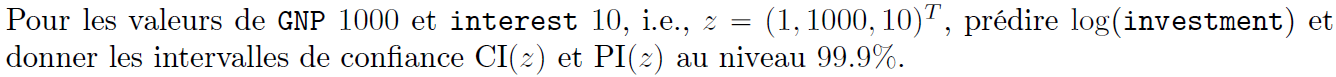

#### On prédit log(investment) pour "GNP=1000" et "interest=10" 

In [48]:
gnp_1000 = np.log(1000)

y_pred_invest_log = theta_chapeau_0 + (theta_chapeau_1 * gnp_1000) + (theta_chapeau_2 * 10)

print("y_pred_invest_log = ", y_pred_invest_log)
print("y_pred_invest_reel = ", np.exp(y_pred_invest_log))

y_pred_invest_log =  5.0159837304835255
y_pred_invest_reel =  150.80441472099818


Résultat : Pour z = (1, 1000, 10)^T : 
log(investment) = 5.016

#### Calcul des intervalles de confiance (IC) et de prédiction (IP) pour : $Z = {(1,1000,10)}^T$

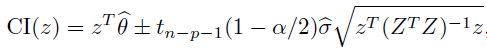

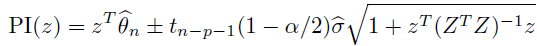

#### Avec 

${(Z^{T}Z)}^{-1}$ = Matrice de Gram

$Z = {(1,1000,10)}^T$

$\hat\theta = {(\hat\theta_{0}, \hat\theta_{1}, \hat\theta_{2})}^T$

${\hat\sigma}^2 = {\hat\sigma_{\epsilon}}^2$

$t_{n - p - 1} = (Quantile_{student}) pour \alpha = 0.001$ 

#### Rappel :

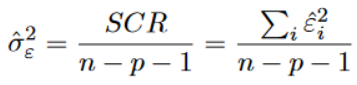

In [49]:
# Calcul du quantile de Student pour un niveau de 99,9 %

from scipy import stats

# n-p-1 avec 
# n = 15
# p = 2 car on a une variable explicative qui est "GNP" et "interest"

alpha = 1 - (0.001 / 2)

liberty_degree_t_stat = len(data_invest_["invest"]) - 3 # on détermine le degré de liberté

quantile_student_bis = stats.t(df=liberty_degree_t_stat).ppf((1-alpha, alpha))

quantile_student_bis

array([-4.31779128,  4.31779128])

In [50]:
z_ = np.array([1, np.log(1000), 10])

theta_chapeau = np.array([theta_chapeau_0, theta_chapeau_1, theta_chapeau_2])

# Calcul de l'intervalle de confiance pour z = (1, 1000, 10)^T au niveau 99,9 %

IC_inf_z_ = np.dot(z_.T, theta_chapeau) + quantile_student_bis[0] * np.sqrt(sigma_epsilon_carre) * np.sqrt(z_.T.dot(gram_inv).dot(z_))

IC_sup_z_ = np.dot(z_.T, theta_chapeau) + quantile_student_bis[1] * np.sqrt(sigma_epsilon_carre) * np.sqrt(z_.T.dot(gram_inv).dot(z_))

print("IC_inf_z_ = ", IC_inf_z_)

print("IC_sup_z_ = ", IC_sup_z_)

# Calcul de l'intervalle de prédiction pour z = (1, 1000, 10)^T au niveau 99,9%

IP_inf_z_ = np.dot(z_.T, theta_chapeau) + quantile_student_bis[0] * np.sqrt(sigma_epsilon_carre) * np.sqrt(1 + (z_.T.dot(gram_inv).dot(z_)))

IP_sup_z_ = np.dot(z_.T, theta_chapeau) + quantile_student_bis[1] * np.sqrt(sigma_epsilon_carre) * np.sqrt(1 + (z_.T.dot(gram_inv).dot(z_)))

print("IP_inf_z_ = ", IP_inf_z_)

print("IP_sup_z_ = ", IP_sup_z_)

IC_inf_z_ =  4.6401840366889235
IC_sup_z_ =  5.3917834242781275
IP_inf_z_ =  4.473803343641108
IP_sup_z_ =  5.558164117325943


#### Question 12

Sur un même graphe à 3 dimensions avec les axes suivants : log(GNP), Interest, et log(Investment),
tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance
à 99:9% (ces surfaces seront tracées sur le domaine de définition des données). On pourra par exemple
utiliser la librairie mplot3D

#### Calcul des intervalles de confiance et de prédiction pour les points de données au niveau de confiance 99,9%

$\alpha = 0.1\%$

In [51]:
def interval_confiance_multi(gnp, interest):
    z = [1, gnp, interest]
    
    IC_inf_z = np.dot(z, theta_chapeau) + quantile_student_bis[0] * np.sqrt(sigma_epsilon_carre) * np.sqrt(np.dot(z,np.dot(gram_inv, z)))
    IC_sup_z = np.dot(z, theta_chapeau) + quantile_student_bis[1] * np.sqrt(sigma_epsilon_carre) * np.sqrt(np.dot(z,np.dot(gram_inv, z)))
    
    IP_inf_z = np.dot(z, theta_chapeau) + quantile_student_bis[0] * np.sqrt(sigma_epsilon_carre) * np.sqrt(1 + np.dot(z,np.dot(gram_inv, z)))
    IP_sup_z = np.dot(z, theta_chapeau) + quantile_student_bis[1] * np.sqrt(sigma_epsilon_carre) * np.sqrt(1 + np.dot(z,np.dot(gram_inv, z)))
                                                                                                                                                                                     
    return IC_inf_z, IC_sup_z, IP_inf_z, IP_sup_z

# interval_confiance_multi(1000, 10)
    

In [52]:
def Qgi(name):
    Q = np.ones((13,15))
    for i in range(13):
        for f in range(15):
            g, h, j, k = interval_confiance_multi(data_invest_["gnp"][i], data_invest_["interest"][f])
            if name == "IC_inf_z":
                Q[i][f] = g
            elif name == "IC_sup_z":
                Q[i][f] = h
            elif name == "IP_inf_z":
                Q[i][f] = j
            elif name == "IP_sup_z":
                Q[i][f] = k
    return Q.T

#### On trace le graphique avec : 
- Le nuage de points
- La droite de regression
- Les intervalles de confiance et de prédiction

In [53]:
data_invest_

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50
5,1973,7.190224,5.437209,105.75,6.44
6,1974,7.268362,5.432411,115.08,7.83
7,1975,7.345494,5.328361,125.79,6.25
8,1976,7.448916,5.552572,132.34,5.50
9,1977,7.559195,5.781052,140.05,5.46


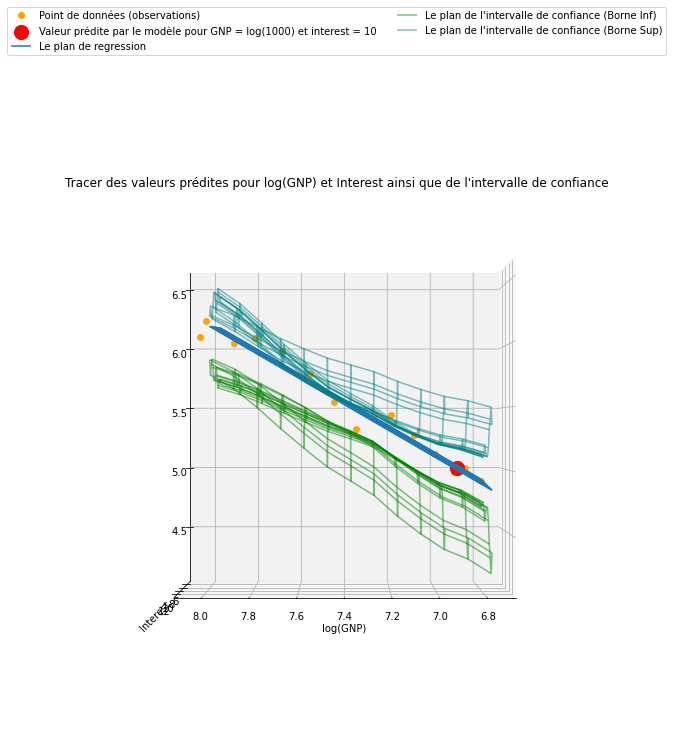

In [54]:
from mpl_toolkits.mplot3d import Axes3D

X = data_invest_[['gnp', 'interest']]
X = sm.add_constant(X)

y = data_invest_["invest"]

# On défini notre domaine de définition du plan de regression
XX = np.arange(min(data_invest_["gnp"]), max(data_invest_["gnp"]), 0.1)
YY = np.arange(min(data_invest_["interest"]), max(data_invest_["interest"]), 0.6)

xx, yy = np.meshgrid(XX, YY)

zz = theta_chapeau_0 + theta_chapeau_1*xx + theta_chapeau_2*yy

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# On trace la valeur prédite par le modèle pour GNP = log(1000) et interest = 10
ax.scatter(gnp_1000, 10, y_pred_invest_log, label="Valeur prédite par le modèle pour GNP = log(1000) et interest = 10", marker="o", color="red", s=200)

# On trace le nuage des points de nos données (X = log(GNP) et Y = interest)
ax.plot(X['gnp'],X['interest'],y,'o', color = "orange", label = "Point de données (observations)")

# On trace le plan de regression
ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1, label = "Le plan de regression")

# On trace le plan de l'intervalle de confiance

ax.plot_wireframe(xx, yy, Qgi('IC_inf_z'), rstride=1, cstride=1, color = "green", label = "Le plan de l'intervalle de confiance (Borne Inf)", alpha=0.5)
ax.plot_wireframe(xx, yy, Qgi('IC_sup_z'), rstride=1, cstride=1, color = "teal", label = "Le plan de l'intervalle de confiance (Borne Sup)", alpha=0.5)

# 0n trouve le bonne angle de visualisation des données
ax.azim = 90
ax.elev = 0

plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title("Tracer des valeurs prédites pour log(GNP) et Interest ainsi que de l'intervalle de confiance")

plt.xlabel("log(GNP)", size=10)
plt.ylabel("Interest", size=10)

plt.show()

#### On change l'angle de vue

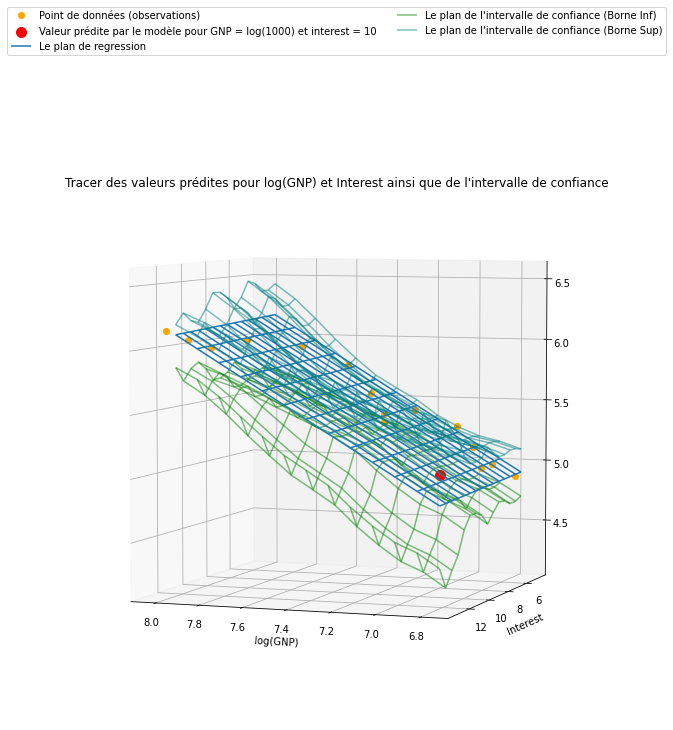

In [55]:
from mpl_toolkits.mplot3d import Axes3D

X = data_invest_[['gnp', 'interest']]
X = sm.add_constant(X)

y = data_invest_["invest"]

# On défini notre domaine de définition du plan de regression
XX = np.arange(min(data_invest_["gnp"]), max(data_invest_["gnp"]), 0.1)
YY = np.arange(min(data_invest_["interest"]), max(data_invest_["interest"]), 0.6)

xx, yy = np.meshgrid(XX, YY)

zz = theta_chapeau_0 + theta_chapeau_1*xx + theta_chapeau_2*yy

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# On trace la valeur prédite par le modèle pour GNP = log(1000) et interest = 10
ax.scatter(gnp_1000, 10, y_pred_invest_log, label="Valeur prédite par le modèle pour GNP = log(1000) et interest = 10", marker="o", color="red", s=100)

# On trace le nuage des points de nos données (X = log(GNP) et Y = interest)
ax.plot(X['gnp'],X['interest'],y,'o', color = "orange", label = "Point de données (observations)")

# On trace le plan de regression
ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1, label = "Le plan de regression")

# On trace le plan de l'intervalle de confiance

ax.plot_wireframe(xx, yy, Qgi('IC_inf_z'), rstride=1, cstride=1, color = "green", label = "Le plan de l'intervalle de confiance (Borne Inf)", alpha=0.5)
ax.plot_wireframe(xx, yy, Qgi('IC_sup_z'), rstride=1, cstride=1, color = "teal", label = "Le plan de l'intervalle de confiance (Borne Sup)", alpha=0.5)

# 0n trouve le bonne angle de visualisation des données
ax.azim = 110
ax.elev = 5

plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title("Tracer des valeurs prédites pour log(GNP) et Interest ainsi que de l'intervalle de confiance")

plt.xlabel("log(GNP)", size=10)
plt.ylabel("Interest", size=10)

plt.show()

#### Question 13

En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest
10

#### Calcul de la valeur "investment" prédit par le modèlé pour (GNP = 1000, Interest = 10)

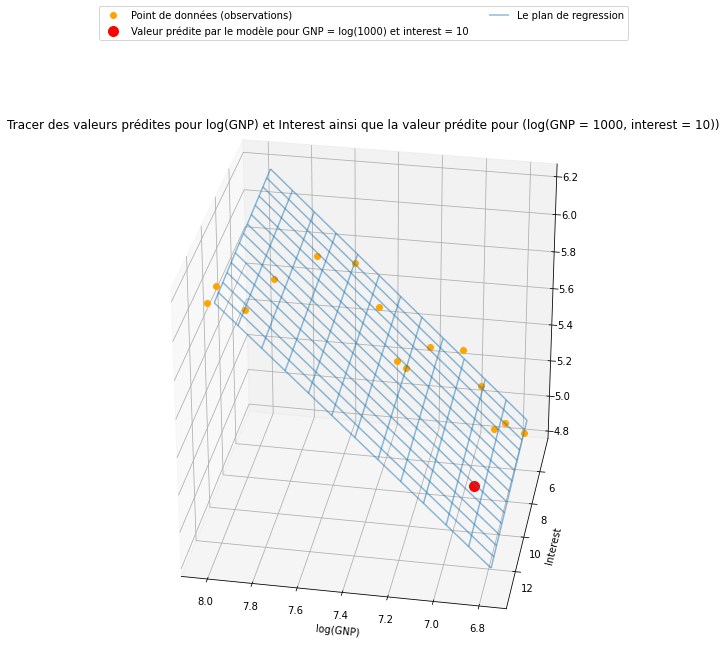

In [56]:
from mpl_toolkits.mplot3d import Axes3D

X = data_invest_[['gnp', 'interest']]
X = sm.add_constant(X)

y = data_invest_["invest"]

# On défini notre domaine de définition du plan de regression
XX = np.arange(min(data_invest_["gnp"]), max(data_invest_["gnp"]), 0.1)
YY = np.arange(min(data_invest_["interest"]), max(data_invest_["interest"]), 0.6)

xx, yy = np.meshgrid(XX, YY)

zz = theta_chapeau_0 + theta_chapeau_1*xx + theta_chapeau_2*yy

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# On trace la valeur prédite par le modèle pour GNP = log(1000) et interest = 10
ax.scatter(gnp_1000, 10, y_pred_invest_log, label="Valeur prédite par le modèle pour GNP = log(1000) et interest = 10", marker="o", color="red", s=100)

# On trace le nuage des points de nos données (X = log(GNP) et Y = interest)
ax.plot(X['gnp'],X['interest'],y,'o', color = "orange", label = "Point de données (observations)")

# On trace le plan de regression
ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1, label = "Le plan de regression", alpha=0.5)

# 0n trouve le bonne angle de visualisation des données
ax.azim = 100
ax.elev = 30

plt.title("Tracer des valeurs prédites pour log(GNP) et Interest ainsi que la valeur prédite pour (log(GNP = 1000, interest = 10))")

plt.xlabel("log(GNP)", size=10)
plt.ylabel("Interest", size=10)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.show()

#### On change l'angle de vue

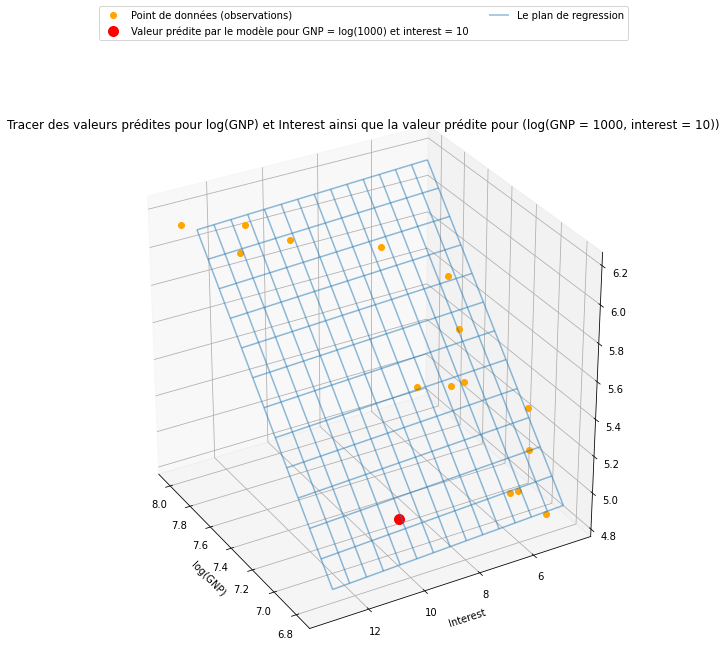

In [57]:
from mpl_toolkits.mplot3d import Axes3D

X = data_invest_[['gnp', 'interest']]
X = sm.add_constant(X)

y = data_invest_["invest"]

# On défini notre domaine de définition du plan de regression
XX = np.arange(min(data_invest_["gnp"]), max(data_invest_["gnp"]), 0.1)
YY = np.arange(min(data_invest_["interest"]), max(data_invest_["interest"]), 0.6)

xx, yy = np.meshgrid(XX, YY)

zz = theta_chapeau_0 + theta_chapeau_1*xx + theta_chapeau_2*yy

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

# On trace la valeur prédite par le modèle pour GNP = log(1000) et interest = 10
ax.scatter(gnp_1000, 10, y_pred_invest_log, label="Valeur prédite par le modèle pour GNP = log(1000) et interest = 10", marker="o", color="red", s=100)

# On trace le nuage des points de nos données (X = log(GNP) et Y = interest)
ax.plot(X['gnp'],X['interest'],y,'o', color = "orange", label = "Point de données (observations)")

# On trace le plan de regression
ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1, label = "Le plan de regression", alpha=0.5)

# 0n trouve le bonne angle de visualisation des données
ax.azim = 150
ax.elev = 30

plt.title("Tracer des valeurs prédites pour log(GNP) et Interest ainsi que la valeur prédite pour (log(GNP = 1000, interest = 10))")

plt.xlabel("log(GNP)", size=10)
plt.ylabel("Interest", size=10)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.show()

#### Vérification des valeurs trouvées dans les questions précédentes avec la librairie sk-learn 

In [58]:
import statsmodels.formula.api as stm

model = stm.ols(formula='invest ~ gnp + interest', data = data_invest_)
fit = model.fit()

fit.summary()

C:\Users\asus\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 invest   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           2.44e-09
Time:                        08:38:57   Log-Likelihood:                 16.424
No. Observations:                  15   AIC:                            -26.85
Df Residuals:                      12   BIC:                            -24.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1805      0.662     -3.292      0.006      -3.624      -0.737
gnp            1.0512      0.102     10.300      0.000       0.829       1.274
interest      -0.0065      0.015     -0.425      0.678      -0.040       0.027
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.862
Skew:                          -0.557   Prob(JB):                        0.650
Kurtosis:                       2.627   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### La valeur prédite par le modèle (avec librairie) pour $z=(1,log(1000),10)$ renvoie : 

In [59]:
X = data_invest_[['gnp', 'interest']]
X = sm.add_constant(X)
Y = data_invest_['invest']

x = np.log(1000)
y = 10

results = sm.OLS(Y, X).fit().params
y_pred = results[0] + results[1]*x + results[2]*y

print("on retrouve bien la valeur prédite par nos calculs précédemment soit y_pred =",y_pred)
print("y_pred(log(1000), 10) = ", np.exp(y_pred))

on retrouve bien la valeur prédite par nos calculs précédemment soit y_pred = 5.015983730482687
y_pred(log(1000), 10) =  150.80441472087173


## Conclusion : 

### Avec la librairie statsmodel nous obtenons les valeurs suivantes 

##### $\hat\theta_{0} = -2.1805$ (Intercept) <br> $\hat\theta_{1} = 1.0512$ (GNP) <br> $\hat\theta_{2} = -0.0065$ (Investment) <br> ${R}^2 = 0.0963$ (Investment)

$\hat\sigma_{\hat\theta_{0}} = 0.662$ (Intercept)

$\hat\sigma_{\hat\theta_{1}} = 0.102$ (GNP)

$\hat\sigma_{\hat\theta_{2}} = 0.015$ (Investment)

**Cela correspond bien aux valeurs que nous avons trouvés aux questions précédentes**

**La librairie valide bien les résultats que nous avons trouvés**